In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def compute_accuracies(path):
    df = pd.read_csv(path)
    cols = df.columns.tolist()
    
    model_cols = cols[2:]
    models = ['Gemma1B', 'Gemma4B', 'Llama 1B', 'Llama 8B', 'Deepseek 1.5B', 'Deepseek 8B']
    
    acc = {}
    for i, m in enumerate(models):
        correct_col = model_cols[2*i + 1]
        acc[m] = pd.to_numeric(
        df[correct_col]
          .astype(str)
          .str.strip()
          .str.lower()
          .replace({'yes':'1','no':'0'})
          .replace({'true':'1','false':'0'}),
        errors='coerce'
    ).mean()
    return acc

In [3]:
lies    = 'LLM Responses - Lies - ADL.csv'
fallacy = 'LLM Responses - Fallacy-AR.csv'
penguin = 'LLM Responses - Penguins - ADL.csv'
shuffle = 'LLM Responses - Shuffle - ARV.csv'
hyper = 'LLM Responses - Hyper-ARV.csv'
salient = 'LLM Responses - Salient - BL.csv'
counting = 'LLM Responses - Counting-AR.csv'
dyck = 'LLM Responses - Dyck - BL.csv'
riddles = 'LLM Responses - Riddles - Simple.csv'
multi = 'LLM Responses - Juan.csv'

lies_acc    = compute_accuracies(lies)
fallacy_acc = compute_accuracies(fallacy)
penguin_acc = compute_accuracies(penguin)
shuffle_acc = compute_accuracies(shuffle)
hyper_acc   = compute_accuracies(hyper)
salient_acc = compute_accuracies(salient)
counting_acc = compute_accuracies(counting)
dyck_acc   = compute_accuracies(dyck)
riddles_acc = compute_accuracies(riddles)
multi_acc  = compute_accuracies(multi)

acc_df = pd.DataFrame([lies_acc, fallacy_acc, penguin_acc, shuffle_acc, hyper_acc, salient_acc, counting_acc, dyck_acc, riddles_acc, multi_acc],
                      index=['Web of Lies', 'Formal Fallacies', 'Penguins', 'Shuffled Objects', 'Adjective Order', 'Translation Errors', 'Object Counting', 'Language Correction', 'Riddles', 'Arithmetic'])
print(acc_df)

                      Gemma1B   Gemma4B  Llama 1B  Llama 8B  Deepseek 1.5B  \
Web of Lies          0.500000  0.980000  0.300000  0.440000       0.520000   
Formal Fallacies     0.620000  0.469388  0.553191  0.480000       0.743590   
Penguins             0.300000  0.820000  0.160000  0.400000       0.600000   
Shuffled Objects     0.380000  0.260000  0.280000  0.180000       0.480000   
Adjective Order      0.780000  0.880000  0.560000  0.540000       0.480000   
Translation Errors   0.200000  0.340000  0.120000  0.420000       0.220000   
Object Counting      0.510121  0.676000  0.608000  0.736000       0.400000   
Language Correction  0.240000  0.500000  0.000000  0.100000       0.040000   
Riddles              0.479167  0.833333  0.375000  0.708333       0.083333   
Arithmetic           0.460000  0.720000  0.000000  0.000000       0.740000   

                     Deepseek 8B  
Web of Lies             0.640000  
Formal Fallacies        0.838710  
Penguins                0.920000  
S

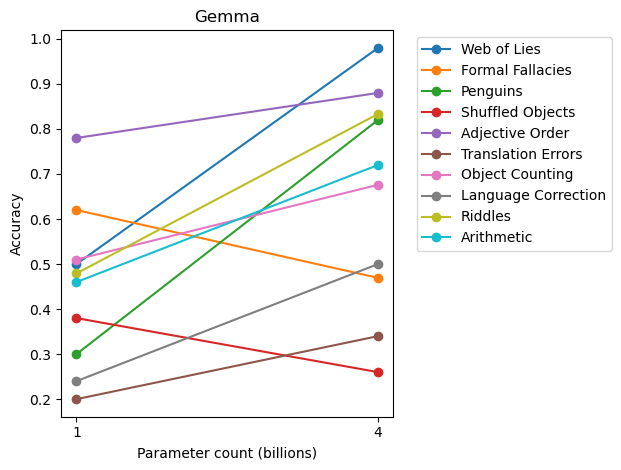

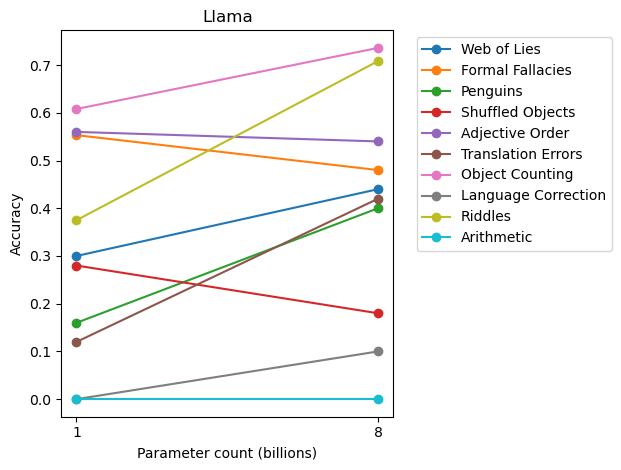

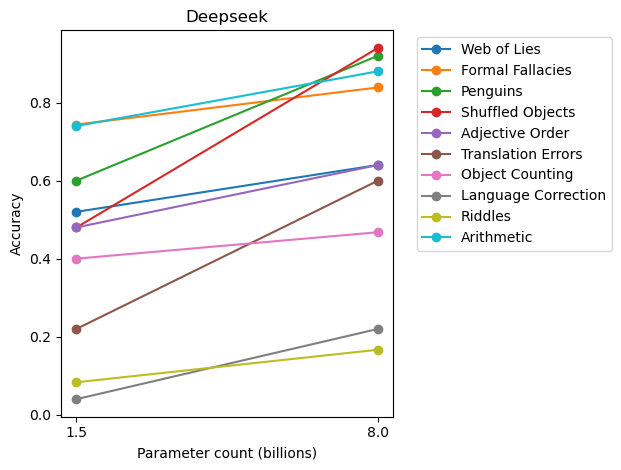

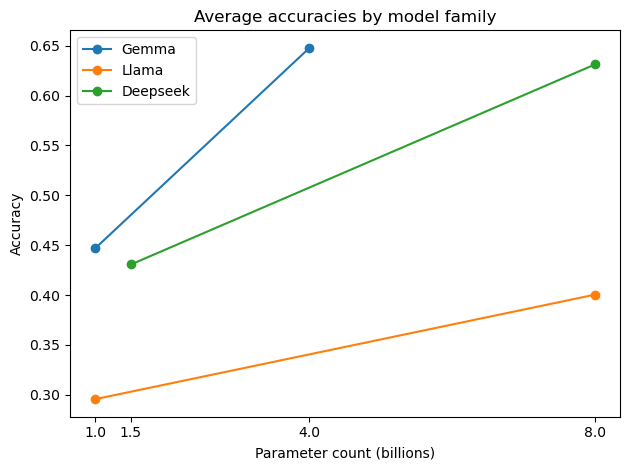

In [4]:
families = {
    'Gemma':    ['Gemma1B',       'Gemma4B'],
    'Llama':    ['Llama 1B',      'Llama 8B'],
    'Deepseek': ['Deepseek 1.5B', 'Deepseek 8B']
}
param_counts = {
    'Gemma1B':        1.0,
    'Gemma4B':        4.0,
    'Llama 1B':       1.0,
    'Llama 8B':       8.0,
    'Deepseek 1.5B':  1.5,
    'Deepseek 8B':    8.0
}

for fam, cols in families.items():
    plt.figure()
    x = [param_counts[m] for m in cols]
    for test in acc_df.index:
        y = acc_df.loc[test, cols].values
        plt.plot(x, y, marker='o', label=test)
    plt.title(f'{fam}')
    plt.xlabel('Parameter count (billions)')
    plt.ylabel('Accuracy')
    plt.xticks(x)
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()

plt.figure()
avg = acc_df.mean(axis=0)
for fam, cols in families.items():
    x = [param_counts[m] for m in cols]
    y = avg[cols].values
    plt.plot(x, y, marker='o', label=fam)
plt.title('Average accuracies by model family')
plt.xlabel('Parameter count (billions)')
plt.ylabel('Accuracy')
all_x = sorted({v for v in param_counts.values()})
plt.xticks(all_x)
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
question_types = {
    'Web of Lies':     'true‑false',
    'Formal Fallacies':  'true‑false',
    'Penguins': 'multiple-choice',
    'Shuffled Objects':  'multiple‑choice',
    'Adjective Order':'multiple-choice',
    'Translation Errors':  'multiple-choice',
    'Object Counting': 'open‑ended',
    'Language Correction':     'open‑ended',
    'Riddles':  'open-ended',
    'Arithmetic':    'open-ended'
}
acc_df['q_type'] = acc_df.index.map(question_types)
acc_df['q_type'] = acc_df['q_type'] \
    .str.replace('‑','-')

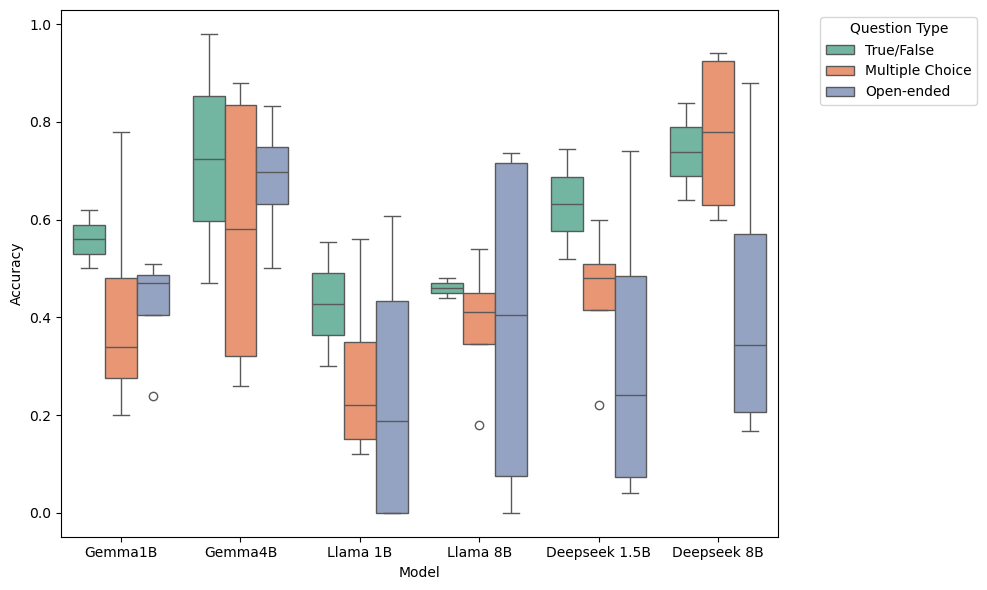

In [6]:
df_long = acc_df.reset_index().melt(
    id_vars=['index','q_type'],
    var_name='model',
    value_name='accuracy'
)

plt.figure(figsize=(10,6))

sns.boxplot(
    data=df_long,
    x='model',
    y='accuracy',
    hue='q_type',
    palette='Set2'
)

handles, _ = plt.gca().get_legend_handles_labels()
custom_labels = ["True/False","Multiple Choice","Open‑ended"]
plt.legend(handles, custom_labels, title='Question Type', 
           bbox_to_anchor=(1.05,1), loc='upper left')

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()